In [1]:
from IPython.display import Image, display
import requests
import json
import os

pp = lambda x: print(json.dumps(x, indent=2))

SKEMA_EQ2MML_SERVICE = os.environ.get("SKEMA_EQMML_ADDRESS", "http://eq2mml:8001")

# Processing equations

## Generating pMML from LaTeX equations

This is a service that converts LaTeX equations into their corresponding presentation MathML format. This service utilizes MathJAX for the conversion process. As an example, we demonstrate the conversion of equations from the SIDARTHE paper.

In [2]:
with open("/data/skema/latex/sidarthe_eqn1.txt", "r") as file:
    tex_equation = file.read()
print(f"The orignial LaTeX: \n{tex_equation}")
r = requests.post("{}/latex/mml".format(SKEMA_EQ2MML_SERVICE), json={"tex_src": tex_equation})
print(f"The presentation MathML: \n{r.text}")

The orignial LaTeX: 
\dot{S}(t)=-S(t)(\alpha I(t)+\beta D(t)+\gamma A(t)+\delta R(t))
The presentation MathML: 
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block" alttext="\dot{S}(t)=-S(t)(\alpha I(t)+\beta D(t)+\gamma A(t)+\delta R(t))">
  <mrow class="MJX-TeXAtom-ORD">
    <mover>
      <mi>S</mi>
      <mo>&#x02D9;<!-- ˙ --></mo>
    </mover>
  </mrow>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mo>&#x2212;<!-- − --></mo>
  <mi>S</mi>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo stretchy="false">(</mo>
  <mi>&#x03B1;<!-- α --></mi>
  <mi>I</mi>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>+</mo>
  <mi>&#x03B2;<!-- β --></mi>
  <mi>D</mi>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>+</mo>
  <mi>&#x03B3;<!-- γ --></mi>
  <mi>A</mi>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>+</mo>
  <mi>&#x

## Generating pMML from equation images
This is a service that converts equation images into their corresponding presentation MathML format using a trained deep neural network. As an example, we showcase the conversion of equations from the SIDARTHE paper.

In [3]:
file = "/data/skema/images/sidarthe_eqn1.png"

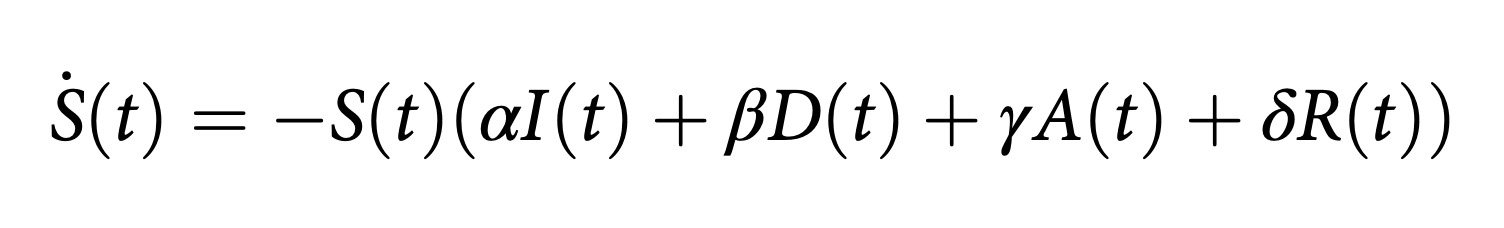

In [4]:
display(Image(filename=file))

In [5]:
files = {
  "data": open(file, "rb"),
}
r = requests.post("{}/image/mml".format(SKEMA_EQ2MML_SERVICE), files=files)
print(r.text)

<math> <mrow> <mover> <mi> S </mi> <mo> &#x02D9 </mo> </mover> </mrow> <mo> ( </mo> <mi> t </mi> <mo> ) </mo> <mo> = </mo> <mo> &#x2212 </mo> <mi> S </mi> <mo> ( </mo> <mi> t </mi> <mo> ) </mo> <mo> ( </mo> <mi> a </mi> <mi> I </mi> <mo> ( </mo> <mi> t </mi> <mo> ) </mo> <mo> + </mo> <mi> &#x03B2 </mi> <mi> D </mi> <mo> ( </mo> <mi> t </mi> <mo> ) </mo> <mo> + </mo> <mi> r </mi> <mi> A </mi> <mo> ( </mo> <mi> t </mi> <mo> ) </mo> <mo> + </mo> <mi> &#x03B4 </mi> <mi> R </mi> <mo> ( </mo> <mi> t </mi> <mo> ) </mo> <mo> ) </mo> </math>
